### если необходимо установим пакеты
Yahoo finance:  
`pip install yfinance`     - установить  
`pip install yfinance -U`  - обновить

Построение и расчет разного на графах:   
`pip install networkx`     - установить  
`pip install networkx -U`  - обновить

Визуализачия интерактивных графов:  
`pip install pyvis` - установить   
`pip install pyvis -U` - установить 

**ВАЖНО ПЕРЕЗАПУСТИТЬ ЯДРО**

### Подключаем пакет

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import datetime
import yfinance as yf
import networkx as nx
from pyvis.network import Network

In [4]:
url= 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
pd.read_html(url)[2]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.84%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.06%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.01%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.87%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.18%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,1.98%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.43%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.28%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.81%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,0.87%


## Диверсификация портфеля
### Загрузка данных

In [6]:
#Импортируем перечень бумаг 
import pandas as pd
url= 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
df = pd.read_html(url)[2]
df.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.84%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,4.06%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.01%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.87%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.18%


In [7]:
#Выгружаем тикера и названия компаний
names=df[['Symbol','Company']]
symbol=names['Symbol'].values
full_name=names['Company'].values
print(symbol)
print(full_name)

['MMM' 'AXP' 'AMGN' 'AMZN' 'AAPL' 'BA' 'CAT' 'CVX' 'CSCO' 'KO' 'DIS' 'GS'
 'HD' 'HON' 'IBM' 'JNJ' 'JPM' 'MCD' 'MRK' 'MSFT' 'NKE' 'NVDA' 'PG' 'CRM'
 'SHW' 'TRV' 'UNH' 'VZ' 'V' 'WMT']
['3M' 'American Express' 'Amgen' 'Amazon' 'Apple' 'Boeing' 'Caterpillar'
 'Chevron' 'Cisco' 'Coca-Cola' 'Disney' 'Goldman Sachs' 'Home Depot'
 'Honeywell' 'IBM' 'Johnson & Johnson' 'JPMorgan Chase' "McDonald's"
 'Merck' 'Microsoft' 'Nike' 'Nvidia' 'Procter & Gamble' 'Salesforce'
 'Sherwin-Williams' 'Travelers' 'UnitedHealth Group' 'Verizon' 'Visa'
 'Walmart']


In [8]:
# какие биржы, какие бумаги
df.groupby('Exchange')['Symbol'].count()

Exchange
NASDAQ     7
NYSE      23
Name: Symbol, dtype: int64

In [9]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

data = yf.download(list(symbol), start=start, end=end)['Close']
data

[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,125.070000,261.649994,85.820000,147.119995,195.389999,238.880005,134.779999,47.939999,173.990005,88.970001,...,239.580002,118.750000,14.315000,151.570007,239.369995,187.119995,518.640015,207.389999,40.119999,47.866669
2023-01-04,126.360001,264.390015,85.139999,150.539993,203.639999,241.360001,139.589996,47.549999,172.139999,91.980003,...,229.100006,121.209999,14.749000,152.229996,244.179993,187.229996,504.500000,212.610001,41.130001,47.919998
2023-01-05,125.019997,266.859985,83.120003,146.429993,204.990005,240.279999,136.339996,46.880001,175.240005,91.919998,...,222.309998,120.620003,14.265000,150.339996,227.750000,187.550003,489.959991,211.110001,41.700001,47.756668
2023-01-06,129.619995,275.200012,86.080002,150.169998,213.000000,248.860001,140.509995,48.320000,176.559998,93.919998,...,224.929993,124.529999,14.859000,153.919998,235.800003,193.869995,490.000000,217.750000,42.189999,48.926666
2023-01-09,130.149994,270.119995,87.360001,150.399994,208.570007,246.619995,147.100006,48.580002,175.179993,94.769997,...,227.119995,124.849998,15.628000,152.039993,236.009995,189.119995,490.059998,218.600006,41.369999,48.316666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.600006,284.160004,153.419998,185.570007,260.440002,290.359985,266.339996,50.090000,151.050003,91.019997,...,374.579987,108.040001,48.830002,145.279999,311.269989,185.800003,520.309998,258.429993,37.490002,52.216667
2023-12-26,193.050003,283.899994,153.410004,185.960007,262.790009,295.630005,266.220001,50.279999,152.410004,90.949997,...,374.660004,108.019997,49.278999,145.940002,312.670013,187.089996,520.030029,259.160004,37.480000,52.136665
2023-12-27,193.149994,286.529999,153.339996,187.059998,262.100006,298.119995,266.720001,50.439999,151.910004,90.379997,...,374.070007,107.129997,49.417000,146.059998,313.269989,188.619995,522.789978,258.929993,37.310001,52.626667


In [10]:
price = data
data.shape

(250, 30)

In [11]:
# тут можно дропнуть колонки, если они заполнены менее чем на 90%
price = price.dropna( thresh = 0.90*len(price.index) , axis='columns')
price.shape

(250, 30)

In [12]:
result_corr = price.corr()
display(result_corr.head())
np.fill_diagonal(result_corr.values,0.)
result_corr.head()

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.054583,0.881090,0.225135,0.405431,0.332767,0.929705,0.394353,-0.680876,-0.556356,...,0.947791,-0.542930,0.918985,0.403735,0.706807,-0.400949,0.374690,0.764155,-0.581242,0.701142
AMGN,0.054583,1.000000,0.404805,-0.240879,0.145712,0.575459,0.186502,0.271137,0.001445,-0.250479,...,0.237353,-0.235757,0.301438,0.104669,0.491475,-0.062388,0.706203,0.522673,-0.113492,0.414251
AMZN,0.881090,0.404805,1.000000,0.123563,0.429889,0.581859,0.872555,0.505562,-0.629164,-0.634918,...,0.936043,-0.657659,0.955786,0.370365,0.850252,-0.394150,0.537934,0.875617,-0.586843,0.805360
AXP,0.225135,-0.240879,0.123563,1.000000,0.662081,0.251049,0.291505,-0.163868,-0.149486,0.389546,...,0.107738,0.269826,0.061163,-0.353304,0.327336,0.388197,-0.143438,0.255916,0.293953,-0.244592
BA,0.405431,0.145712,0.429889,0.662081,1.000000,0.498404,0.535609,-0.003735,-0.228375,0.097241,...,0.338290,0.139322,0.312008,0.098196,0.717908,0.297802,0.143390,0.568620,0.147476,0.041300


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,0.054583,0.881090,0.225135,0.405431,0.332767,0.929705,0.394353,-0.680876,-0.556356,...,0.947791,-0.542930,0.918985,0.403735,0.706807,-0.400949,0.374690,0.764155,-0.581242,0.701142
AMGN,0.054583,0.000000,0.404805,-0.240879,0.145712,0.575459,0.186502,0.271137,0.001445,-0.250479,...,0.237353,-0.235757,0.301438,0.104669,0.491475,-0.062388,0.706203,0.522673,-0.113492,0.414251
AMZN,0.881090,0.404805,0.000000,0.123563,0.429889,0.581859,0.872555,0.505562,-0.629164,-0.634918,...,0.936043,-0.657659,0.955786,0.370365,0.850252,-0.394150,0.537934,0.875617,-0.586843,0.805360
AXP,0.225135,-0.240879,0.123563,0.000000,0.662081,0.251049,0.291505,-0.163868,-0.149486,0.389546,...,0.107738,0.269826,0.061163,-0.353304,0.327336,0.388197,-0.143438,0.255916,0.293953,-0.244592
BA,0.405431,0.145712,0.429889,0.662081,0.000000,0.498404,0.535609,-0.003735,-0.228375,0.097241,...,0.338290,0.139322,0.312008,0.098196,0.717908,0.297802,0.143390,0.568620,0.147476,0.041300


In [13]:
# важно помнить откуда взялся abs
result=(abs(result_corr)>=0.8).astype(int)
#result=(result_corr>=0.9).astype(int)
result.head()

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
AMGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMZN,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
AXP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


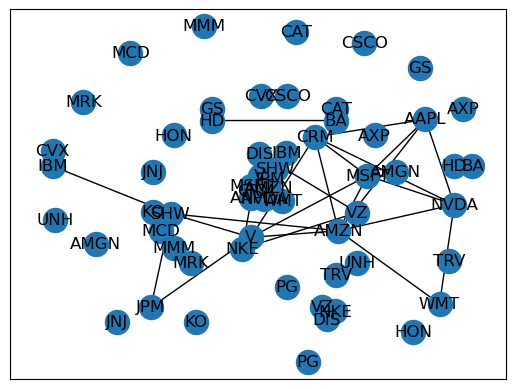

In [14]:
A=result.values
G=nx.from_numpy_array(A)
mapping=dict(zip(G.nodes(),result.index))

G1=nx.relabel_nodes(G,mapping)

nx.draw_networkx(G1)
nx.draw_networkx(G1,pos=nx.kamada_kawai_layout(G1))
plt.show()

In [15]:
clique=list(nx.find_cliques(G1))
print(clique)
max_clique=max(clique,key=len)
print()
print("максимальная ",max_clique)

[['BA', 'HD'], ['NKE', 'VZ', 'DIS'], ['UNH'], ['PG'], ['IBM', 'SHW'], ['CVX'], ['GS'], ['TRV'], ['JNJ'], ['MRK'], ['JPM', 'SHW', 'V'], ['AMGN'], ['HON'], ['CAT'], ['MMM'], ['MCD'], ['AXP'], ['CSCO'], ['AMZN', 'MSFT', 'CRM', 'NVDA', 'AAPL'], ['AMZN', 'MSFT', 'CRM', 'V'], ['AMZN', 'SHW', 'V'], ['AMZN', 'WMT', 'NVDA'], ['KO']]

максимальная  ['AMZN', 'MSFT', 'CRM', 'NVDA', 'AAPL']


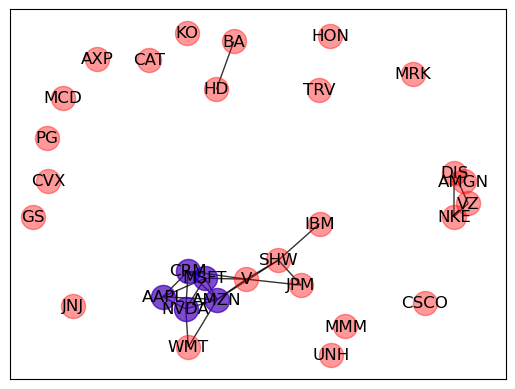

In [16]:
pos = nx.spring_layout(G1,dim=2,k=0.5)
nx.draw_networkx_nodes(G1,pos,node_color='r',alpha=0.4)
nx.draw_networkx_nodes(G1,pos,nodelist=max_clique,node_color='b',alpha=0.5)
nx.draw_networkx_edges(G1,pos,width=1.0,alpha=0.8)
nx.draw_networkx_labels(G1,pos)
plt.show()


In [17]:
# Имена бумаг в клике
max_clique_name=names.loc[names['Symbol'].isin(max_clique)]
display(max_clique_name)
# Только имена бумаг
print(max_clique_name['Company'].values)

,Symbol,Company
3,AMZN,Amazon
4,AAPL,Apple
19,MSFT,Microsoft
21,NVDA,Nvidia
23,CRM,Salesforce


['Amazon' 'Apple' 'Microsoft' 'Nvidia' 'Salesforce']


In [18]:
no_max_clique_name=names.loc[~names['Symbol'].isin(max_clique)]
no_max_clique_name

,Symbol,Company
0,MMM,3M
1,AXP,American Express
2,AMGN,Amgen
5,BA,Boeing
6,CAT,Caterpillar
7,CVX,Chevron
8,CSCO,Cisco
9,KO,Coca-Cola
10,DIS,Disney
11,GS,Goldman Sachs


In [19]:
df=pd.DataFrame(price, columns=max_clique_name['Symbol'].values)
display(df.head(3))
display(df.shape)
display(df.describe())
df = df.pct_change().fillna(0).cumsum()
display(df.head())

,AMZN,AAPL,MSFT,NVDA,CRM
Date,,,,,
2023-01-03,85.820000,125.070000,239.580002,14.315,134.779999
2023-01-04,85.139999,126.360001,229.100006,14.749,139.589996
2023-01-05,83.120003,125.019997,222.309998,14.265,136.339996


(250, 5)

,AMZN,AAPL,MSFT,NVDA,CRM
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,121.372800,172.549000,313.951001,36.569260,203.995200
std,18.900946,17.331672,40.975858,10.756455,26.855404
min,83.120003,125.019997,222.309998,14.265000,134.779999
25%,102.254999,162.112499,282.994987,26.899750,191.715004
50%,126.830002,175.475006,324.650009,41.893499,207.105003
75%,135.360001,187.330002,337.897499,45.646250,215.969997
max,154.070007,198.110001,382.700012,50.409000,267.250000


,AMZN,AAPL,MSFT,NVDA,CRM
Date,,,,,
2023-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,-0.007924,0.010314,-0.043743,0.030318,0.035688
2023-01-05,-0.031649,-0.000290,-0.073381,-0.002498,0.012405
2023-01-06,0.003962,0.036504,-0.061596,0.039142,0.042991
2023-01-09,0.018832,0.040593,-0.051859,0.090896,0.089891


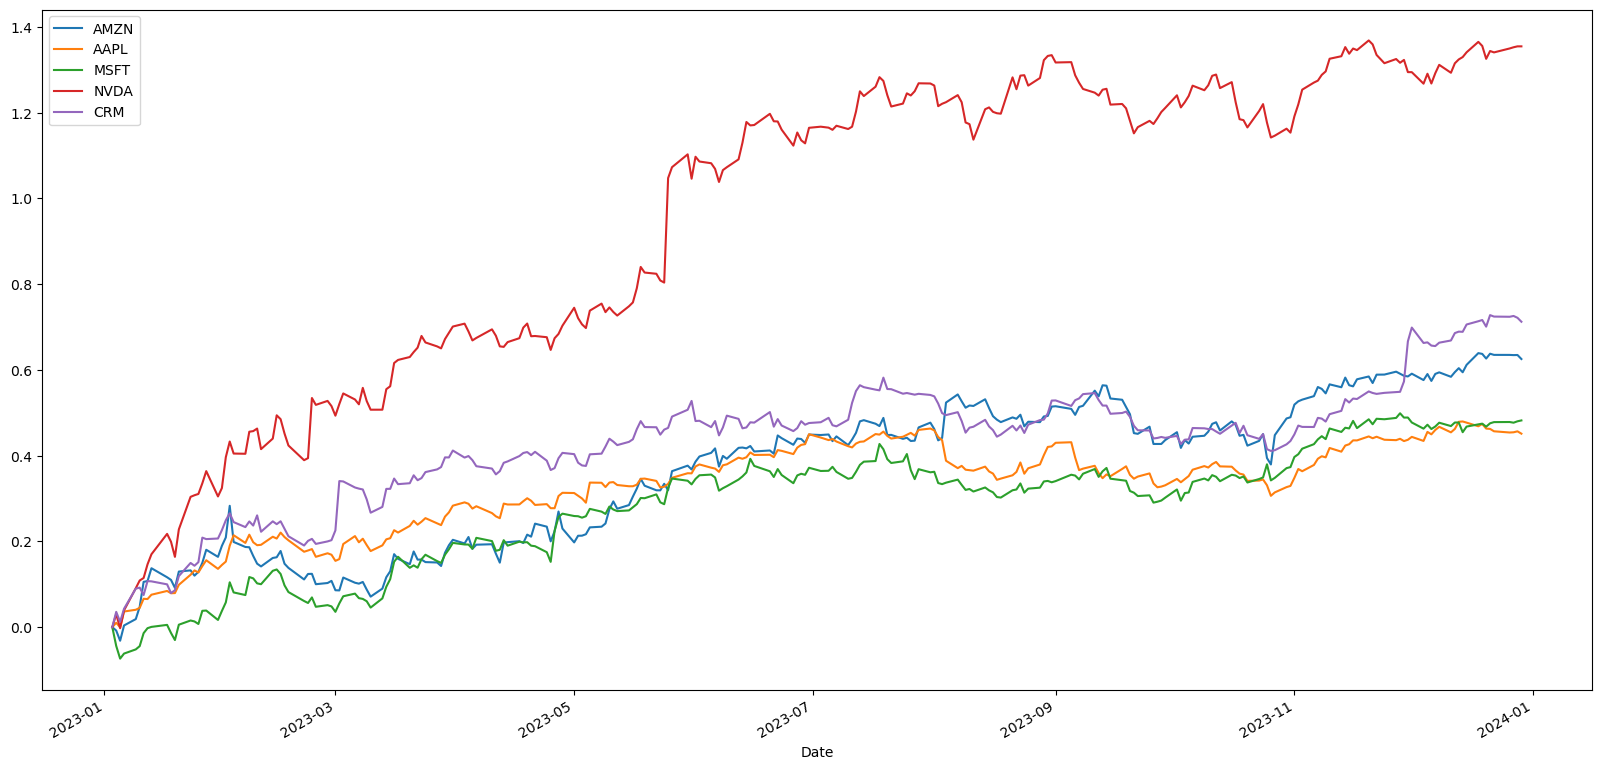

In [20]:
# кстати это график из Pandas, а не Matplotlib
df.plot(figsize = (20,10));

## Интерактивные графы

In [22]:
net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G1)
net.show("example_01.html")

example_01.html


In [23]:
net = Network(notebook=True, cdn_resources='remote')

colours = []

for node in G1.nodes: 
    if node in max_clique:
        net.add_node(node, color='red')  # меняем цвет для узлов в максимальной клике
    else:
        net.add_node(node)

for e in G1.edges:
    if e in nx.complete_graph(max_clique).edges:  # если ребро часть максимальной клики
        color = 'red'
        width = 4
    else:
        color = 'black'
        width = 2
    net.add_edge(e[0], e[1], color=color, width=width)

net.edges
net.show("example_02.html")    

example_02.html
